In [ ]:
import modin.pandas as mpd
df = mpd.read_csv(r"2022_Yellow_Taxi_Trip_Data_20250414.csv")
print(df.head())
print(df.dtypes)
# check how many values are missing in each column
print(df.isnull().sum())
# make a copy of the dataframe, remove 2, 3 columns and rename the columns


   VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  passenger_count  \
0         1  01/01/2022 12:35:40 AM  01/01/2022 12:53:29 AM                2   
1         1  01/01/2022 12:33:43 AM  01/01/2022 12:42:07 AM                1   
2         2  01/01/2022 12:53:21 AM  01/01/2022 01:02:19 AM                1   
3         2  01/01/2022 12:25:21 AM  01/01/2022 12:35:23 AM                1   
4         2  01/01/2022 12:36:48 AM  01/01/2022 01:14:20 AM                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80           1                  N           142           236   
1           2.10           1                  N           236            42   
2           0.97           1                  N           166           166   
3           1.09           1                  N           114            68   
4           4.30           1                  N            68           163   

   payment_type  fare_amount  extra  mta_tax

In [ ]:
df_cleaned = df.copy()

In [41]:
# convert the pickup and dropoff datetime columns to datetime objects
df_cleaned['tpep_pickup_datetime'] = mpd.to_datetime(df_cleaned['tpep_pickup_datetime'])
df_cleaned['tpep_dropoff_datetime'] = mpd.to_datetime(df_cleaned['tpep_dropoff_datetime'])
df_cleaned.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [42]:
df_cleaned = df_cleaned.drop(columns=['improvement_surcharge', 'store_and_fwd_flag'])

In [43]:
# sample randomly 20% of the data
df_sample = df_cleaned.sample(frac=0.2, random_state=42)
# save the sample to a new CSV file
df_sample.to_csv('sampled_yellow_taxi_data.csv', index=False)

In [44]:
print(df_cleaned.isnull().sum())

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count          1368303
trip_distance                  0
RatecodeID               1368303
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
total_amount                   0
congestion_surcharge     1368303
airport_fee              1368303
dtype: int64


In [45]:
# how many rows are there in the sampled dataframe
print(len(df_cleaned))

39656098


In [46]:
missing_cols = ['passenger_count', 'RatecodeID', 'congestion_surcharge', 'airport_fee']

# Create a boolean mask for rows where ALL 4 columns are NaN
all_missing_mask = df_cleaned[missing_cols].isnull().all(axis=1)

# Count how many rows this applies to
num_all_missing = all_missing_mask.sum()

print(f"Rows with all 4 values missing: {num_all_missing}")

Rows with all 4 values missing: 1368303


In [48]:
# how many rows have negative values in the 'fair_amount' column
print(len(df_cleaned[df_cleaned['fare_amount'] < 0]))
# how many rows have negative values in the 'total_amount' column  
print(len(df_cleaned[df_cleaned['total_amount'] < 0]))

252900
255706


In [49]:
df_cleaned[df_cleaned['fare_amount'] < 0]['payment_type'].value_counts(normalize=True)


payment_type
4    0.569114
2    0.214393
3    0.212578
0    0.002910
1    0.001004
Name: proportion, dtype: float64

In [50]:
# remove row if the fare amount is negative
df_cleaned = df_cleaned[df_cleaned['fare_amount'] >= 0]
# remove row if the total amount is negative
df_cleaned = df_cleaned[df_cleaned['total_amount'] >= 0]


In [51]:
# count dimensions of the dataframe
print(df_cleaned.shape)

(39400334, 17)


In [52]:
df_cleaned.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2,3.80,1,142,236,1,14.5,3.0,0.5,3.65,0.0,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1,2.10,1,236,42,1,8.0,0.5,0.5,4.00,0.0,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1,0.97,1,166,166,1,7.5,0.5,0.5,1.76,0.0,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1.09,1,114,68,2,8.0,0.5,0.5,0.00,0.0,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1,4.30,1,68,163,1,23.5,0.5,0.5,3.00,0.0,30.30,2.5,0.0


In [53]:
# get database statistics
df_cleaned.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee
count,3.940033e+07,39400334,39400334,3.803277e+07,3.940033e+07,3.803277e+07,3.940033e+07,3.940033e+07,3.940033e+07,3.940033e+07,3.940033e+07,3.940033e+07,3.940033e+07,3.940033e+07,3.940033e+07,3.803277e+07,3.803277e+07
mean,1.719997e+00,2022-07-05 01:52:13.747857408,2022-07-05 02:43:23.061845504,1.401496e+00,5.964815e+00,1.425609e+00,1.648807e+02,1.625909e+02,1.175661e+00,1.503856e+01,1.016672e+00,4.951005e-01,2.767381e+00,5.419709e-01,2.193000e+01,2.310182e+00,9.900869e-02
min,1.000000e+00,2001-01-01 00:03:14,2001-01-01 00:34:17,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.218000e+01,-5.000000e-01,-1.647000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2022-04-07 20:26:34.249999872,2022-04-07 20:42:02.249999872,1.000000e+00,1.100000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.230000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-06-30 22:45:48,2022-06-30 23:02:20.500000,1.000000e+00,1.900000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.050000e+01,5.000000e-01,5.000000e-01,2.160000e+00,0.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-10-04 18:39:20,2022-10-04 18:54:24,1.000000e+00,3.570000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.650000e+01,2.500000e+00,5.000000e-01,3.390000e+00,0.000000e+00,2.316000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-04-18 14:30:05,2023-04-18 23:30:39,9.000000e+00,3.896785e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,2.548000e+01,1.400160e+03,9.118700e+02,4.010956e+05,2.750000e+00,1.250000e+00
std,4.815579e-01,NaN,NaN,9.639946e-01,5.989360e+02,5.813415e+00,6.531112e+01,7.023299e+01,4.864666e-01,9.604575e+01,1.260284e+00,5.142765e-02,3.295540e+00,2.043501e+00,9.661496e+01,6.622016e-01,3.375769e-01


In [54]:
# check how many entries are from different years in 'tpep_pickup_datetime' column
print(df_cleaned['tpep_pickup_datetime'].dt.year.value_counts())

tpep_pickup_datetime
2022    39399790
2002         424
2009          40
2008          34
2021          24
2003           9
2001           6
2023           6
2012           1
Name: count, dtype: int64


In [55]:
# only keep the rows from 2022
df_cleaned = df_cleaned[df_cleaned['tpep_pickup_datetime'].dt.year == 2022]

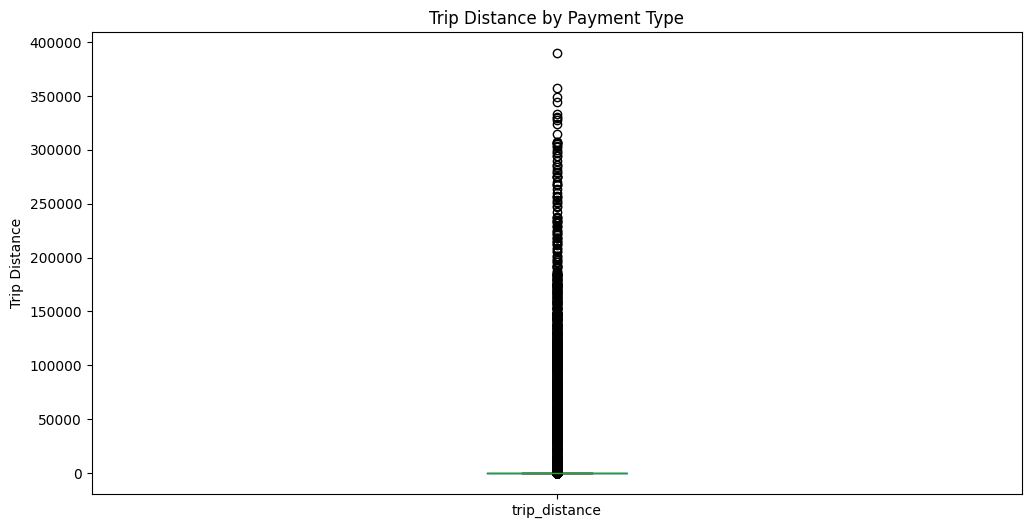

In [56]:
# create box and whisker plot for the fare trip_distance
df_cleaned.boxplot(column='trip_distance',  figsize=(12, 6), grid=False)
import matplotlib.pyplot as plt
plt.suptitle('')
plt.title('Trip Distance by Payment Type')
plt.ylabel('Trip Distance')
plt.show()

In [ ]:
# create box and whisker plot for the fare amount
df_cleaned.boxplot(column='fare_amount', by='payment_type', figsize=(12, 6), grid=False)
plt.suptitle('')
plt.title('Fare Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Fare Amount')
plt.show()

In [38]:
# remove outliers from trip_distance
q1 = df_cleaned['trip_distance'].quantile(0.25)
q3 = df_cleaned['trip_distance'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_cleaned = df_cleaned[(df_cleaned['trip_distance'] >= lower_bound) & (df_cleaned['trip_distance'] <= upper_bound)]

In [1]:
# create box and whisker plot for the fare trip_distance
df_cleaned.boxplot(column='trip_distance',  figsize=(12, 6), grid=False)
import matplotlib.pyplot as plt
plt.suptitle('')
plt.title('Trip Distance by Payment Type')
plt.ylabel('Trip Distance')
plt.show()

NameError: name 'df_cleaned' is not defined